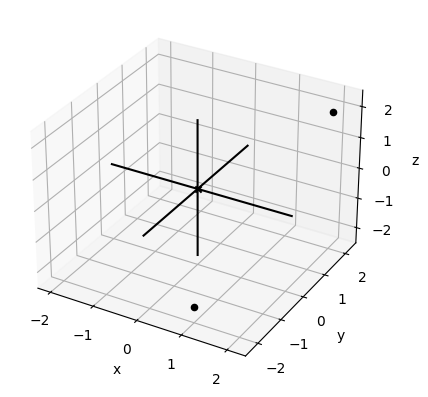

In [1]:
from draw3d import *

draw3d(
    Points3D((2,2,2),(1,-2,-2))
)

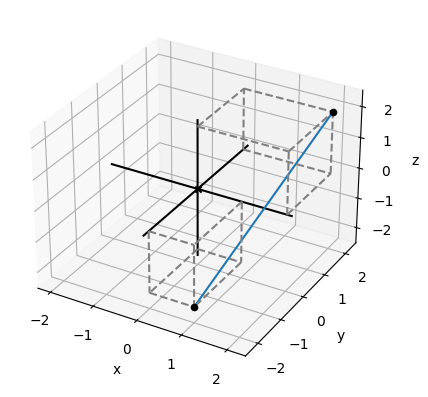

In [2]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Segment3D((2,2,2),(1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

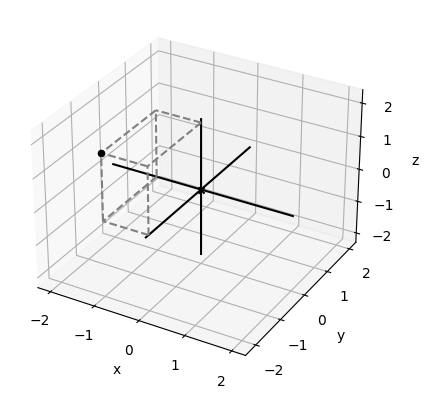

In [3]:
draw3d(
    Points3D((-1,-2,2)),
    Box3D(-1,-2,2)
)

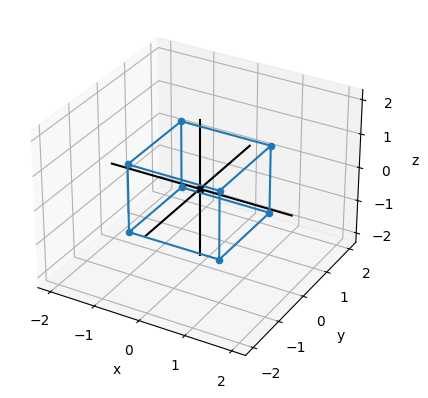

In [4]:
pm1 = [1,-1]
vertices = [
    (x,y,z) 
    for x in pm1
    for y in pm1
    for z in pm1
]

edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
        [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
        [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

draw3d(
    Points3D(*vertices, color=blue),
    *[Segment3D(*edge) for edge in edges]
)

In [5]:
def add (*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [6]:
from math import sqrt
def length (v):
    return sqrt(sum([coord ** 2 for coord in v]))

In [7]:
print(length((3,4,12)))

13.0


In [8]:
def scale(scalar, v):
    return tuple(scalar * coord for coord in v)


In [9]:
def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

In [10]:
print(dot((1,0),(0,2)))

0


In [11]:
from math import acos
def angle_between(v1,v2):
    return acos(
        dot(v1,v2) / (length(v1) * length(v2))
    )

In [12]:
def cross(u,v):
    ux,uy,uz = u
    vx,vy,vz = v
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

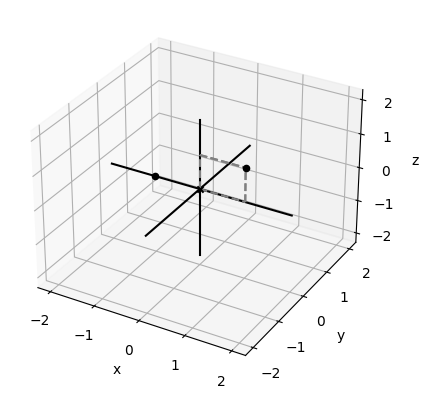

In [13]:
draw3d(
    Points3D((1,0,1), (-1,0,0)),
    Box3D(1,0,1),
)

In [14]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

def verticies(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [15]:
def component(v,direction):
    return(dot(v,direction)/length(direction))

In [16]:
def vector_to_2d(v):
    return(component(v,(1,0,0)), component(v,(0,1,0)))

In [17]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [18]:
print(component((2,3,4), (0,0,5)))

4.0


In [19]:
blues = matplotlib.cm.get_cmap('Blues')

In [20]:
def unit(v):
    return scale(1.0/length(v),v)

def subtract(v1,v2):
    return (v1[0] -v2[0], v1[1] - v2[1], v1[0] - v2[1])

In [21]:
def normal(face):
    return(cross(subtract(face[1], face[0]),subtract(face[2], face[0])))

In [25]:

def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[ 2 ] > 0 :
            c = color_map( 1 - dot(unit(normal(face)), unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

In [31]:
from draw3d import *
from vectors import *
from draw2d import *

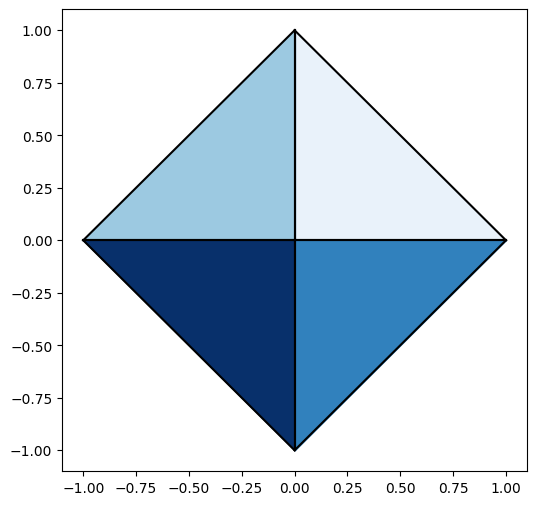

In [32]:
render(octahedron, lines=black)